# Joyplots

In [1]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris


## Obligatory iris stuff

Though not a great fit for this kind of visualization, we can generate some joyplots with the `iris` dataset.

In [2]:
iris = pd.read_csv("data/iris.csv")

# Optionally, can be replaced with:
iris, y = load_iris(as_frame=True, return_X_y=True)
iris.columns = ["SepalLength","SepalWidth","PetalLength","PetalWidth"]
iris["Name"] = y.replace([0,1,2], ['setosa', 'versicolor', 'virginica'])

By default, `joypy.joyplot()` will draw joyplot with a density subplot for each numeric column in the dataframe.
The density is obtained with the `gaussian_kde` function of `scipy`.

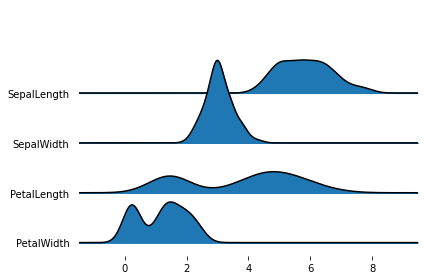

In [3]:
%matplotlib inline

fig, axes = joypy.joyplot(iris)

If you pass a grouped dataframe, or if you pass a column name to the `by` argument, you get a density plot
for each value in the grouped column.

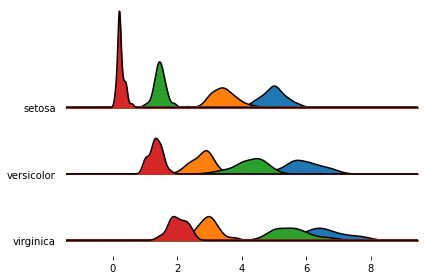

In [4]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name")

In the previous plot, one subplot had a much larger `y` extensions than the others.
Since, by default, the subplots share the `y`-limits, the outlier causes all the other subplots to be quite
compressed.

We can change this behavior letting each subplot take up the whole `y` space with `ylim='own'`, as follows.

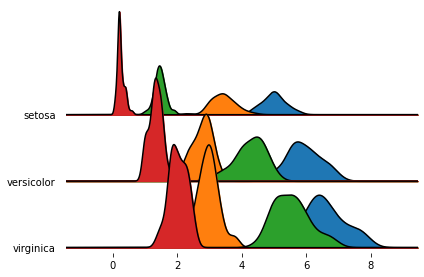

In [5]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", ylim='own')

In this case, we achieved more overlap, but the subplots are no longer directly comparable.

Yet another option is to keep the default ylim behavior (i.e., `ylim='max'`),
and simply increase the overlap factor:

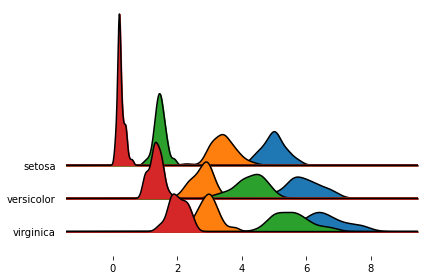

In [6]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", overlap=3)

It's also possible to draw histograms with `hist=True`, though they don't look nice when overlapping, 
so it's better to set `overlap=0`.

With `grid=True` or `grid='both'` you also get grid lines on both axis.

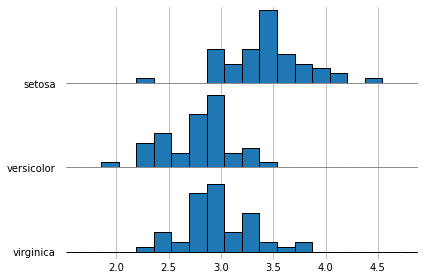

In [7]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, by="Name", column="SepalWidth",
                          hist=True, bins=20, overlap=0,
                          grid=True, legend=False)

## Global daily temperatures

Something that is probably a better fit for joyplots than `iris`: let's visualize the distribution of
global daily temperatures from 1880 to 2014.

(The original file can be found [here](http://berkeleyearth.org/data/))

In [8]:
%matplotlib inline

temp = pd.read_csv("data/daily_temp.csv",comment="%")
temp.head()

,Date Number,Year,Month,Day,Day of Year,Anomaly
0,1880.001,1880,1,1,1,-0.808
1,1880.004,1880,1,2,2,-0.670
2,1880.007,1880,1,3,3,-0.740
3,1880.010,1880,1,4,4,-0.705
4,1880.012,1880,1,5,5,-0.752


The column `Anomaly` contains the global daily temperature (in °C) computed as the difference between the
daily value and the 1950-1980 global average.
We can draw the distribution of the temperatures in time, grouping by `Year`, to see
how the daily temperature distribution shifted across time.

Since the `y` label would get pretty crammed if we were to show all the year labels, we first prepare
a list where we leave only the multiples of 10.

To reduce the clutter, the option `range_style='own'` limits 
the `x` range of each individual density plot to the range where the density is non-zero
(+ an "aestethic" tolerance to avoid cutting the tails too early/abruptly),
rather than spanning the whole `x` axis.

The option `colormap=cm.autumn_r` provides a colormap to use along the plot.

(Grouping the dataframe and computing the density plots can take a few seconds here.)

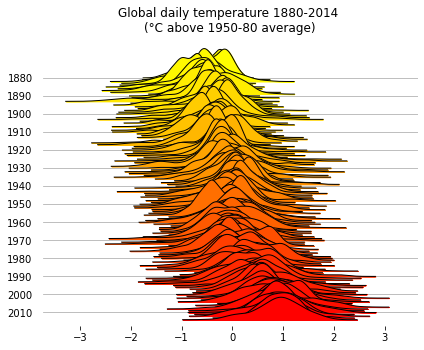

In [9]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(temp.Year.unique())]
fig, axes = joypy.joyplot(temp, by="Year", column="Anomaly", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                          colormap=cm.autumn_r)

If you want, you can also plot the raw counts, rather than the estimated density. 
This results in noisier plots, but it might be preferable in some cases.

With `fade=True`, the subplots get a progressively larger alpha value.

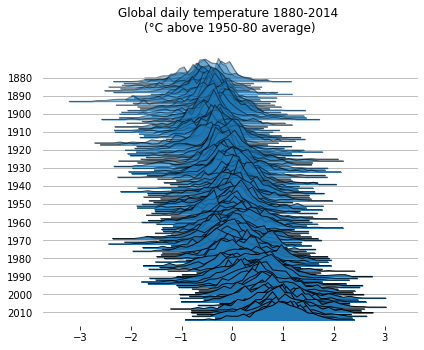

In [10]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(temp.Year.unique())]
fig, axes = joypy.joyplot(temp, by="Year", column="Anomaly", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                          kind="counts", bins=30)

Just for fun, let's plot the same data as it were on the cover of Unknown Pleasures,
the Joy Division's album where the nickname to this kind of visualization comes from.

No labels/grids, no filling, black background, white lines, and a couple of adjustments just to make it look a bit more like the album cover. 

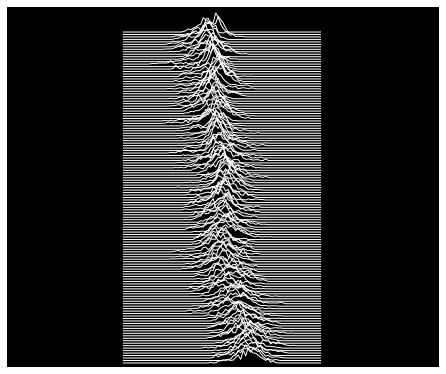

In [11]:
%matplotlib inline

fig, axes = joypy.joyplot(temp,by="Year", column="Anomaly", ylabels=False, xlabels=False, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(6,5),kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-8,8])      

## NBA players - regular season stats

The files can be obtained from [Kaggle datasets](https://www.kaggle.com/drgilermo/nba-players-stats).

In [12]:
players = pd.read_csv("data/Players.csv",index_col=0)
players.head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [13]:
seasons = pd.read_csv("data/Seasons_Stats.csv", index_col=0)
seasons.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Join the dataframes and filter:
- years starting from the 3 point line introduction (1979-80)
- player seasons with at least 10 field goal attempts.

In [14]:
joined = seasons.merge(players, on="Player")
threepoints = joined[(joined.Year > 1979) & (joined["FGA"] > 10)].sort_values("Year")
threepoints["3Pfract"] = threepoints["3PA"]/threepoints.FGA

The fraction of 3 pointers attempted by each player in a season has clearly shifted a lot.  
In today's NBA there's a good number of players who take 40% or more of their shots from behind the line.

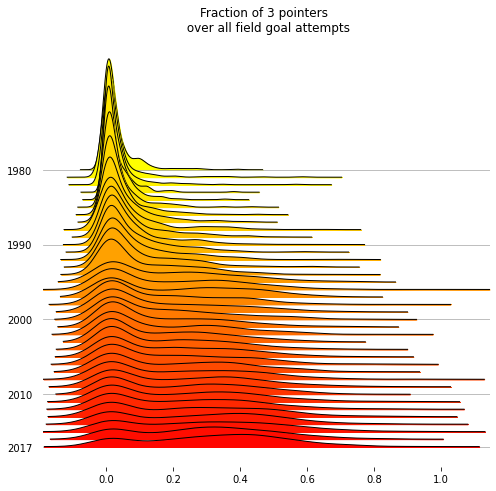

In [15]:
%matplotlib inline

decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoints.Year.unique()]
fig, axes = joypy.joyplot(threepoints, by="Year", column="3Pfract",
                  kind="kde", 
                  range_style='own', tails=0.2, 
                  overlap=3, linewidth=1, colormap=cm.autumn_r,
                  labels=decades, grid='y', figsize=(7,7), 
                  title="Fraction of 3 pointers \n over all field goal attempts")

In this last plot, the distributions of the 3P percentages across the players
are drawn as raw binned counts. 

With `kind=normalized_counts`, the values are normalized
over the occurrences in each year: this is probably needed here, because that the number of teams and players
in the NBA has grown during the years.

The median NBA player has become a much better 3P shooter.

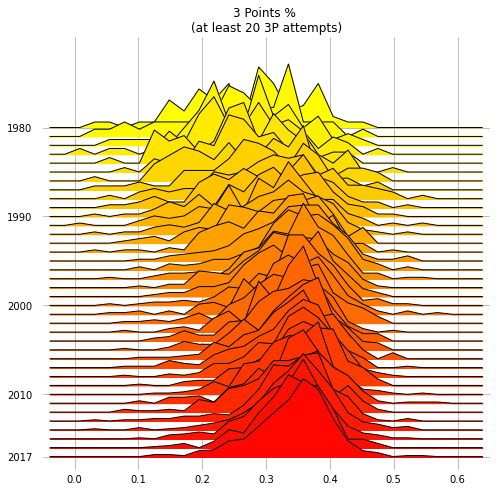

In [16]:
%matplotlib inline

threepoint_shooters = threepoints[threepoints["3PA"] >= 20] 
decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoint_shooters.Year.unique()]
fig, axes = joypy.joyplot(threepoint_shooters, by="Year", column="3P%",
                   kind="normalized_counts", bins=30, 
                   range_style='all', x_range=[-0.05,0.65],
                   overlap=2, linewidth=1, colormap=cm.autumn_r,
                   labels=decades, grid='both', figsize=(7,7),
                   title="3 Points % \n(at least 20 3P attempts)")

# Smoothing with log-normal probability density function  


Normal kernel density smoothing of skewed data may introduce peaks in the tails that may or may not be suitable for the intended purpose. The log-normal probability distribution is often used to summarize data that are skewed to the left with a longish right-hand tail.

#### Covid-19 case-fatality ratio (CFR)

The CFR is simply the number of reported deaths divided by the number of reported cases. Data used in this example are from the New York Times [Coronavirus (Covid-19) Data in the United States](https://github.com/nytimes/covid-19-data). The CFR is computed as the 23 day moving average of deaths divided by the 23 day moving average of cases for the period July 1, 2021 through October 10, 2021 in the 30 largest "geographies" (counties) in the United States.

Log-normal smoothing is invoked by specifiying ***kind = 'lognorm'*** in the arguments to joyplot(...)

The data compise 3 columns:
1. date - the day of the year as %Y-%m-%d'
2. G - the index of the county included, they range from 0 to 29
3. ratio - case fatality ratio computed as 23 day moving average of deaths divided by the 23 day moving average of cases:
Two additonal optional arguments are added to the joyplot(...) argument list"
- nomalize - divide the probabilities of each value of the CFR by the sum of the probabilities so that the pdf sums to 1.0 (***default: True***)
- floc - force coerse the location parameter (***default: None***)

            date   G     ratio
0     2021-07-01   0  0.016220
1     2021-07-01   1  0.025500
2     2021-07-01   2  0.057024
3     2021-07-01   3  0.124694
4     2021-07-01   4  0.021969
...          ...  ..       ...
3685  2021-10-31  25  0.058410
3686  2021-10-31  26  0.006895
3687  2021-10-31  27  0.012857
3688  2021-10-31  28  0.021012
3689  2021-10-31  29  0.006212

[3690 rows x 3 columns]
This might take a while. It is estimating and drawing 123 lognormal probability density functions.


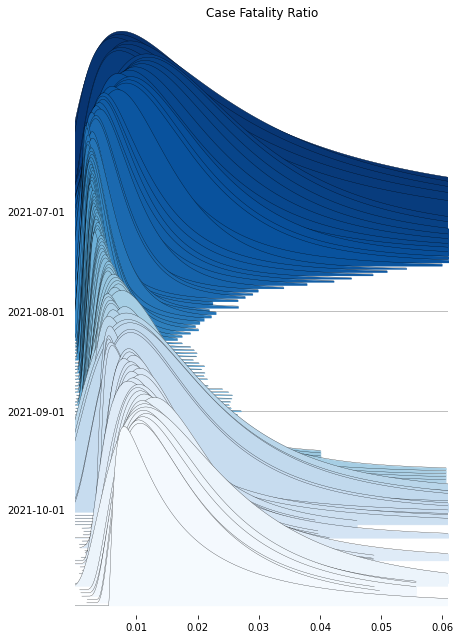

In [17]:
%matplotlib inline

CFR = pd.read_csv("data/CFR.csv",comment='#')
print(CFR)

# select non-zero ratios
zmask = CFR['ratio'] > 0

# only create labels for the first day of each month to prevent crowding
labels = CFR['date'].unique()
for i in range(1,len(labels)):
    if labels[i].split('-')[2] != '01':
        labels[i] = None
        
print('This might take a while. It is estimating and drawing',len(labels),
      'lognormal probability density functions.')

fig,axes = joypy.joyplot(CFR[zmask], by='date', column='ratio', labels = labels,
                       kind = 'lognorm', range_style='own', tails = 0.1, 
                       overlap = 4, x_range=[0.0,0.061], grid="y",
                       linewidth=0.25, figsize=(6.5,9.0),
                       title='Case Fatality Ratio',colormap=cm.Blues_r,
                       ylim = 'own', normalize = True, floc=None)

# Plotting with pre-aggregated data

In case you have already aggregated data and you just want to plot them as a joyplot, you can still use joypy.

Suppose we have a bunch of aggregated visit counts for each hour of the day.

In [18]:
np.random.seed(42)
df = pd.DataFrame(np.random.poisson(10,(24,7)))
df.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12,6,11,14,7,8,9
1,11,8,10,7,11,11,8
2,12,6,7,8,10,5,3
3,9,13,8,6,13,12,13
4,9,14,8,8,12,15,13


To plot them, simply call `joyplot()` with the option `kind=values`.
Note that you need to manually handle some stuff about the range of the x-axis and the x ticks.

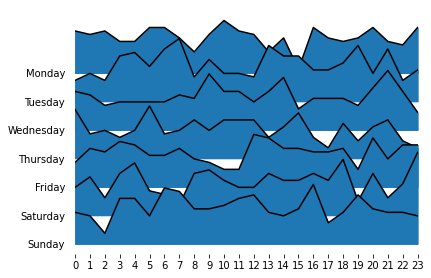

In [19]:
%matplotlib inline
x_range = list(range(24))
fig, axes = joypy.joyplot(df, kind="values", x_range=x_range)
axes[-1].set_xticks(x_range);

# Plotting with raw data (not in a dataframe)

Joypy can also be used to plot data not contained in a pandas dataframe. The simplest structure we can use is actually a list of lists or arrays.

In [20]:
x = np.arange(0,100,0.1)
y =[n*x for n in range(1,4)]

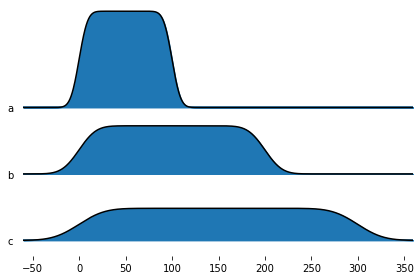

In [21]:
fig, ax = joypy.joyplot(y, labels=["a","b","c"])

Another possibility is passing a dictionary. 

**Note**: until 3.6, python dictionary were not guaranteed to preserve their order. From 3.7+, dictionaries preserve the insertion order.

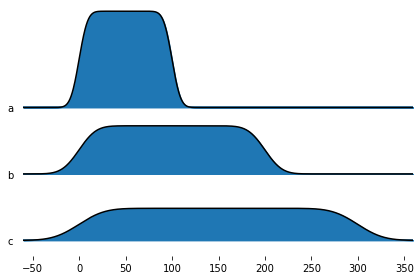

In [22]:
labels = ["a","b","c"]
d = {l:v for l,v in zip(labels,y)}
fig, ax = joypy.joyplot(d)

# On colors

Colors can be specified with combinations of the arguments `fill`, `color`, `linecolor`, `colormap`.

A few minimal examples below.

By default, the arguments are:
- `fill=True`
- `color=None`
- `linecolor=None`
- `colormap=None`.


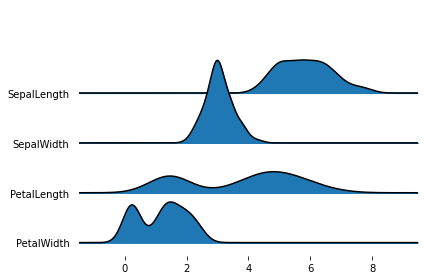

In [23]:
%matplotlib inline
fig, axes = joypy.joyplot(iris)

With the default `fill=True`, `color` or `colormap` are used to set the fill color and `linecolor` is used to set the line color.

If both `color` and `colormap` are passed, `color` has the precedence.

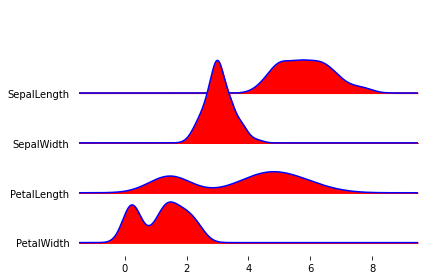

In [24]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, color="red", linecolor="blue")

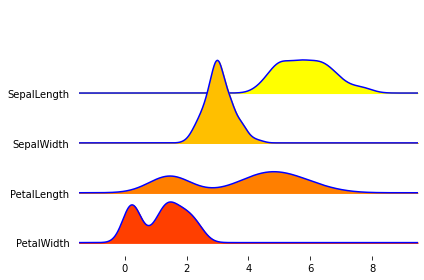

In [25]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, linecolor="blue", colormap=cm.autumn_r)

With `fill=False`, the color of the line can be set in 3 ways: `color`, `linecolor`, `colormap`. 
If more than one argument is passed, the precedence is `linecolor` > `color` > `colormap`.

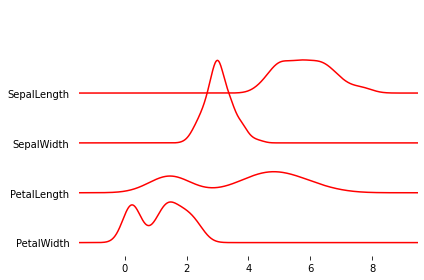

In [26]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, fill=False, color="r")

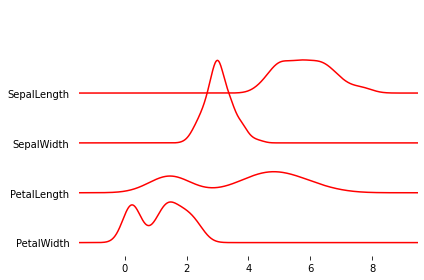

In [27]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, fill=False, linecolor="r")

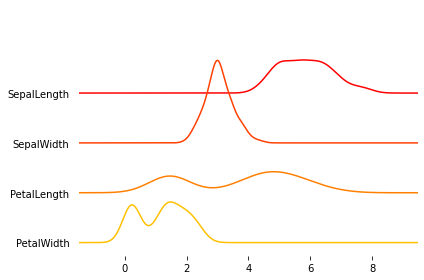

In [28]:
%matplotlib inline
fig, axes = joypy.joyplot(iris,fill=False, colormap=cm.autumn)

If more than one argument is passed, the precedence goes `linecolor` > `color` > `colormap`.

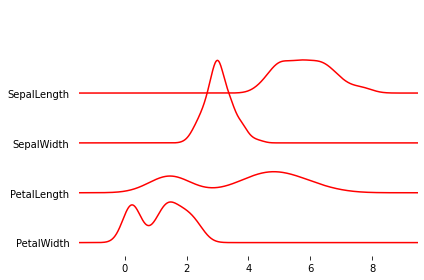

In [29]:
%matplotlib inline
fig, axes = joypy.joyplot(iris, fill=False, linecolor="r", color="g", colormap=cm.autumn)

When grouping the dataframe with the argument `by`, you can pass a list of colors
with the same size of the colums you want to plot.

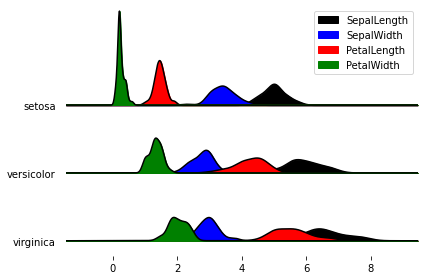

In [30]:
%matplotlib inline
fig, axes = joypy.joyplot(iris,fill=True, legend=True, by="Name", color=["k","b","r","g"])

You can do the same with colormaps, although the resulting plot might be rather hard to parse.  
Note also that the legend only uses the color in the first subplot.

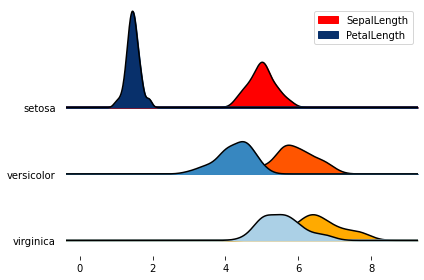

In [31]:
%matplotlib inline
fig, axes = joypy.joyplot(iris,fill=True, legend=True, by="Name", column=["SepalLength","PetalLength"],
                          colormap=[cm.autumn,cm.Blues_r])